<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Tensorflow_learning_at_Udacity/blob/master/3_Intro_to_tensor_flow_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Aim here is to train our first model, which will be able to convert celsius to fahrenheit</h3><br>
$F = C * 1.8 + 32$<br>
_where $F = Fahrenheit$ and $C = Celsius$_ 

In [ ]:
# First we import tensorflow and numpy and tell tensorflow only to log error messages

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np
import numpy as np
import pandas as pd

print(tf.__version__)

1.13.1


## <font color='red'>The Data Set

In [ ]:
# ML is all about having the features and labels, and then training the model to be able to map these two.

celsius_q = np.array([-40.0, -10.0, 0.0, 8.0, 15.0, 22.0, 38.0])
fahrenheit_a = np.array([-40.0, 14.0, 32.0, 46.4, 59.0, 71.6, 100.4])

for i, k in enumerate(celsius_q):
  print('{} Degrees Celsius, is equal to {} Degrees Fahrenheit'.format(k, fahrenheit_a[i]))


-40.0 Degrees Celsius, is equal to -40.0 Degrees Fahrenheit
-10.0 Degrees Celsius, is equal to 14.0 Degrees Fahrenheit
0.0 Degrees Celsius, is equal to 32.0 Degrees Fahrenheit
8.0 Degrees Celsius, is equal to 46.4 Degrees Fahrenheit
15.0 Degrees Celsius, is equal to 59.0 Degrees Fahrenheit
22.0 Degrees Celsius, is equal to 71.6 Degrees Fahrenheit
38.0 Degrees Celsius, is equal to 100.4 Degrees Fahrenheit


### Some Machine Learning terminology

 - **Feature** — The input(s) to our model. In this case, a single value — the degrees in Celsius.

 - **Labels** — The output our model predicts. In this case, a single value — the degrees in Fahrenhet.
 
 - **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `celsius_q` and `fahrenhet_a` at a specific index, such as `(22,72)`.

## <font color='red'>The Model<br>
  ## Create the model

Next create the model. We will use simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron. 

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celcius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the later would need to match the `input_shape` of the next layer.)


In [ ]:
l0 = tf.keras.layers.Dense(input_shape=[1], units=1)

print('Finished Building Layer')

Finished Building Layer


### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [ ]:
model = tf.keras.Sequential([l0])

print('Model is Ready')

Model is Ready


In [ ]:
# The above two processes can also be done in one line like below

# model = tf.keras.Sequential(tf.keras.layers.Dense(input_shape=[1], units=1))

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss").

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. <br>**In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.**

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learnign rate (`0.1` in the code below). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1


In [ ]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

print('Model compiled Successfully')

Model compiled Successfully


<h3>Train The Model:</h3>


Train the model by calling the `fit` method. 

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are intially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted. 

**This cycle of calculate, compare, adjust is controlled by the `fit` method.** The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.<br>

Since we have 7 pairs or examples here and 500 epochs, this means our model will train a total of 3500 times. Interesting...

In [ ]:
trained = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print('Finished Training')

Finished Training


## Display training statistics

The `fit` method returns a trained object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`. 

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.



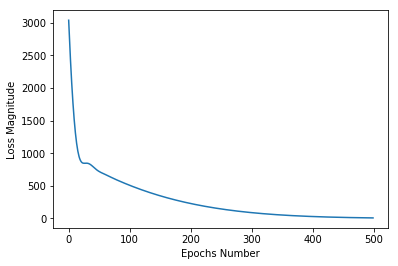

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs Number')
plt.ylabel('Loss Magnitude')
plt.plot(trained.history['loss'])

In [ ]:
hist_obj = pd.DataFrame(trained.history)
hist_obj['Epoch'] = trained.epoch
hist_obj.tail(10)

,loss,Epoch
490,9.424588,490
491,9.298238,491
492,9.173413,492
493,9.050100,493
494,8.928301,494
495,8.807976,495
496,8.689118,496
497,8.571695,497
498,8.455717,498
499,8.341162,499


## Use the model to predict values

Now you have a model that has been trained to learn the relationshop between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees. 

So, for example, if the Celsius value is 200, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [ ]:
def test_model(model):
  MSE = []
  for x in range(100, 1100, 100):
    y_hat = model.predict([x]).astype(float)
    y_hat = y_hat[0]
    y = x * 1.8 + 32
    error_squ = (y_hat - y)**2
    MSE.append(error_squ)
    print('Degree Celsius is {}, Degree Fahrenheit is {}, Model predicted {}, Diff_Squared is {}'.format(x, y, y_hat, error_squ ))
  MSE = sum(MSE) / len(MSE)
  print('Total MSE is {}'.format(MSE))
  

print(test_model(model))

Degree Celsius is 100, Degree Fahrenheit is 212.0, Model predicted [211.57168579], Diff_Squared is [0.18345306]
Degree Celsius is 200, Degree Fahrenheit is 392.0, Model predicted [394.07052612], Diff_Squared is [4.28707843]
Degree Celsius is 300, Degree Fahrenheit is 572.0, Model predicted [576.56933594], Diff_Squared is [20.87883091]
Degree Celsius is 400, Degree Fahrenheit is 752.0, Model predicted [759.06817627], Diff_Squared is [49.95911578]
Degree Celsius is 500, Degree Fahrenheit is 932.0, Model predicted [941.5670166], Diff_Squared is [91.52780665]
Degree Celsius is 600, Degree Fahrenheit is 1112.0, Model predicted [1124.06591797], Diff_Squared is [145.58637643]
Degree Celsius is 700, Degree Fahrenheit is 1292.0, Model predicted [1306.56469727], Diff_Squared is [212.13040644]
Degree Celsius is 800, Degree Fahrenheit is 1472.0, Model predicted [1489.06359863], Diff_Squared is [291.1663983]
Degree Celsius is 900, Degree Fahrenheit is 1652.0, Model predicted [1671.56237793], Diff_S

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)



## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [ ]:
layer_weights = l0.get_weights()

print('These are the layer variables, {}.'.format(layer_weights))

These are the layer variables, [array([[1.8249884]], dtype=float32), array([29.072844], dtype=float32)].


The first variable is close to ~1.8 and the second to ~32, even though our model got 28.9. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same. 

Thus $f = y^^ and 1.8 = coefficient  and c= independent variable or feature and 32 = intercept$


### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [ ]:
# Let's create 3 distinct layers for a new model

l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  

In [ ]:
model_2 = tf.keras.Sequential([l0, l1, l2])
model_2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model_2.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model_2.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model_2.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[212.]]
Model predicts that 100 degrees Celsius is: [[212.]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.04263935,  0.03121117,  0.14745662, -0.8372352 ]],
      dtype=float32), array([ 3.5667548,  3.7507272,  1.6116315, -3.4869468], dtype=float32)]
These are the l1 variables: [array([[ 1.175798  , -0.34887686,  0.9903716 , -0.66882604],
       [ 0.01528834,  0.94169295,  1.0330516 , -1.3310477 ],
       [-1.1628541 , -0.6689328 ,  0.5307276 ,  0.22039618],
       [ 0.05929526,  0.19314711, -1.4581889 , -0.09309089]],
      dtype=float32), array([ 0.5754883,  1.3560505,  3.7275972, -2.8126225], dtype=float32)]
These are the l2 variables: [array([[-4.5324415e-02],
       [-3.7824412e-04],
       [ 1.3235353e+00],
       [-6.3898998e-01]], dtype=float32), array([3.4489613], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the `l0` and `l1` layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.

Stay tuned for the upcoming video on how Dense layers work for the explanation.

In [ ]:
# Let's also test model_2 with the same data as model

print(test_model(model_2))

Degree Celsius is 100, Degree Fahrenheit is 212.0, Model predicted [212.], Diff_Squared is [0.]
Degree Celsius is 200, Degree Fahrenheit is 392.0, Model predicted [392.], Diff_Squared is [0.]
Degree Celsius is 300, Degree Fahrenheit is 572.0, Model predicted [572.00006104], Diff_Squared is [3.7252903e-09]
Degree Celsius is 400, Degree Fahrenheit is 752.0, Model predicted [751.99987793], Diff_Squared is [1.49011612e-08]
Degree Celsius is 500, Degree Fahrenheit is 932.0, Model predicted [932.], Diff_Squared is [0.]
Degree Celsius is 600, Degree Fahrenheit is 1112.0, Model predicted [1112.], Diff_Squared is [0.]
Degree Celsius is 700, Degree Fahrenheit is 1292.0, Model predicted [1292.], Diff_Squared is [0.]
Degree Celsius is 800, Degree Fahrenheit is 1472.0, Model predicted [1471.99987793], Diff_Squared is [1.49011612e-08]
Degree Celsius is 900, Degree Fahrenheit is 1652.0, Model predicted [1652.], Diff_Squared is [0.]
Degree Celsius is 1000, Degree Fahrenheit is 1832.0, Model predicted 

<h4><font color='brown'>Mean while with this new model of 3 layers, the performance is amazing as MSE has gone down from 279.2 to a mere 1.4 !! amazing stuff</font></h4>

<h3>By now you should know what the following terms are:</h3>

<font color='magenta'>**Feature:** </font>The input(s) to our model<br>
<font color='magenta'>**Examples:**</font> An input/output pair used for training<br>
<font color='magenta'>**Labels:**</font> The output of the model<br>
<font color='magenta'>**Layer:**</font> A collection of nodes connected together within a neural network.<br>
<font color='magenta'>**Model:**</font> The representation of your neural network<br>
<font color='magenta'>**Dense and Fully Connected (FC):**</font> Each node in one layer is connected to each node in the previous layer.<br>
<font color='magenta'>**Weights and biases:** </font>The internal variables of model<br>
<font color='magenta'>**Loss:**</font> The discrepancy between the desired output and the actual output<br>
<font color='magenta'>**MSE:**</font> Mean squared error, a type of loss function that counts a small number of large discrepancies as worse than a large number of small ones.<br>
<font color='magenta'>**Gradient Descent:**</font> An algorithm that changes the internal variables a bit at a time to gradually reduce the loss function.<br>
<font color='magenta'>**Optimizer:**</font> A specific implementation of the gradient descent algorithm. (There are many algorithms for this. In this course we will only use the “Adam” Optimizer, which stands for ADAptive with Momentum. It is considered the best-practice optimizer.)<br>
<font color='magenta'>**Learning rate:**</font> The “step size” for loss improvement during gradient descent.<br>
<font color='magenta'>**Batch:** </font>The set of examples used during training of the neural network<br>
<font color='magenta'>**Epoch:**</font> A full pass over the entire training dataset<br>
<font color='magenta'>**Forward pass:**</font> The computation of output values from input<br>
<font color='magenta'>**Backward pass (backpropagation):**</font> The calculation of internal variable adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.

<h2>ReLU</h2>

**The Rectified Linear Unit [(ReLU)](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)**<br>
In this lesson we talked about ReLU and how it gives our Dense layer more power. ReLU stands for Rectified Linear Unit and it is a mathematical function that looks like this:

<img src='https://s3.amazonaws.com/video.udacity-data.com/topher/2019/March/5c7f0cff_tensorflow-l3f1/tensorflow-l3f1.png' height=250 width=400>

As we can see, the ReLU function gives an output of 0 if the input is negative or zero, and if input is positive, then the output will be equal to the input.

ReLU gives the network the ability to solve nonlinear problems.

Converting Celsius to Fahrenheit is a linear problem because f = 1.8*c + 32 is the same form as the equation for a line, y = m*x + b. But most problems we want to solve are nonlinear. In these cases, adding ReLU to our Dense layers can help solve the problem.

ReLU is a type of activation function. There several of these functions (ReLU, Sigmoid, tanh, ELU), but ReLU is used most commonly and serves as a good default. To build and use models that include ReLU, you don’t have to understand its internals.



<h2>Softmax Function<h2>

**Softmax** function, is a wonderful activation function that **turns numbers aka logits into probabilities** that sum to one. It’s also a core element used in deep learning classification tasks.<br>

See a visual repesentation of the Softmax function below.<br>
<img src='https://cdn-images-1.medium.com/max/1000/1*670CdxchunD-yAuUWdI7Bw.png' width=500 height=250>


The **Softmax** function uses a special number called $e$ which stands for $Eulers\:\ Number$.<br>
<h3>$e$ = $2.718$</h3><br>

**Let's write a simple code below to demonstrate how softmax function works.**




In [ ]:
# first let's create a simple table of three animals and their logits(indicating numbers),
# to determine the probability of each animal occurring using the logits and softmax function

animals = {'Dog':[2.0], 'Cat':[1.0], 'Ant':[0.0]}

animal_df = pd.DataFrame(animals)

animal_df = animal_df.transpose()

animal_df.columns = ['Logits']
animal_df.head()

,Logits
Dog,2.0
Cat,1.0
Ant,0.0


In [ ]:
# Now let's define the base or denominator for our Softmax function.

e = 2.718  # e here is the special number called Euler's Number

probability_list = []

# The base of our Softmax function is the sum of e raised to the power of each logit
# This is also the denominator of the function.

denominator = sum(e**animal_df.Logits)  

denominator

11.105523999999999

In [ ]:
# Now let's calculate the Softmax Function

for i in animal_df.Logits:
  probability_list.append(e**i / denominator)  # we raise e by each logit and divide by denominator

probability_list
# see the value of each logit as a probability of the whole.

[0.6652116550286147, 0.24474306660361098, 0.09004527836777446]

In [ ]:
# Finally let's append the probability list as the softmax value to animal_df

animal_df['Softmax_Value'] = probability_list

# let's display the result
animal_df

,Logits,Softmax_Value
Dog,2.0,0.665212
Cat,1.0,0.244743
Ant,0.0,0.090045


In [ ]:
# Let's add a Total sum row to show softmax_value sums up to 1 just as it should

animal_df.loc['Total_Sum'] = animal_df.sum(axis=0)

animal_df

,Logits,Softmax_Value
Dog,2.0,0.665212
Cat,1.0,0.244743
Ant,0.0,0.090045
Total_Sum,3.0,1.000000


Let’s review some of the new terms that were introduced in this lesson:

**Flattening:** The process of converting a 2d image into 1d vector<br>
**ReLU:** An activation function that allows a model to solve nonlinear problems<br>
**Softmax:** A function that provides probabilities for each possible output class<br>
**Classification:** A machine learning model used for distinguishing among two or more output categories